<a href="https://colab.research.google.com/github/JiyoonJeong-Archive/Abnormal-EEG-Signal-Classification-Using-CNNs/blob/main/Neural_Network_Tutorial%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align='center'><img src='https://github.com/jmasis/nntutorialmentaleffort2021/raw/main/Banner.jpg'
alt="2 Layer Network" height=175px width=auto/></p>

# **2nd Workshop on Mental Effort**
# Tutorial 2: An Introduction to Neural Network Modeling
Sebastian Musslick & Javier Alejandro Masis

## Outline

This notebook is composed of three sections, each introducing different concepts of neural network modeling.

1.   In the **first section** we will train a **2-layer feed-forward network** to perform different logical operations (AND/OR/XOR). Using the **delta-rule**, we will teach the network to learn both the *AND* rule, as well as the *OR* rule. Finally, we will investigate the limitations of this network by training it on the non-linear *eXclusive OR (XOR)* rule.

2.   In the **second section** we will train a **3-layer neural network** with a set of non-linear hidden units. We will use **backpropagation** to train the network and show that it is able to learn the XOR rule.
<!-- We will also make an attempt to investigate the network's learned weights in order to understand it's learned solution. -->

3.   ***BONUS:*** In the **third section**, we will build a **connectionist model of cognitive control** (Cohen, Dunbar & McClelland, 1990), and will train it to perform the Stroop task. We will then investigate the model's ability to reproduce the response congruency effect.

## Before we start: Let's import some packages.

To execute the code block below, click on the little arrow symbol on the left side of the code block:

In [ ]:
import numpy as np # for doing math easily in python
import matplotlib.pyplot as plt # for plotting in python
import seaborn as sns # for beautiful plots in python

This might take a minute or two. The arrow should turn into a [1] once the code executed successfully and the packages are loaded. Let's now dive into our first neural network simulation!

## Simulation 1: Two-Layer Neural Network and the Delta-Rule

In this simulation we will train a 2-layer feed-forward network to perform different logical operations (AND/OR/XOR)&mdash;also called "gates"&mdash;based on two input variables. This section will introduce you to the delta rule, one of the most basic learning rules in neural networks. It will also demonstrate fundamental computational limitations of neural networks as famously pointed out by Minsky & Papert (1969).

### Training Environment

Before we build the 2-layer network, we need to define what the network will be tasked with. All tasks provided to the network are expressed as patterns in the training environment. There are two types of patterns. <font color='#4C6EBC'>**Input patterns**</font> are provided to the input layer of the network. <font color='#B04E43'>**Training or output patterns**</font> represent the 'correct' response to the input patterns.

We will define 3 different training environments that are based on the *boolean functions* AND, OR and XOR. The input patterns for each of the environments is the same. Each input pattern consists of 2 bits that are passed to the network. That is, the network takes as input two values that can be either 0 or 1. Each of the three boolean functions (AND/OR/XOR) defines how these two inputs are combined to a single binary output value.

Boolean functions can be expressed in a *truth table*. Every row in a truth table represents a single input pattern with its corresponding output pattern. Below you will find the truth tables for each of the boolean functions that we will use for training.


<br>
<center>**AND**</center>

| <font color='#4C6EBC'>Input 1 | <font color='#4C6EBC'>Input 2 | <font color='#B04E43'>Output</font> |
|---------|---------|--------|
| <font color='#4C6EBC'>0       | <font color='#4C6EBC'>0       | <font color='#B04E43'>0      |
| <font color='#4C6EBC'>0       | <font color='#4C6EBC'>1       | <font color='#B04E43'>0</font>      |
| <font color='#4C6EBC'>1       | <font color='#4C6EBC'>0       | <font color='#B04E43'>0</font>      |
| <font color='#4C6EBC'>1       | <font color='#4C6EBC'>1       | <font color='#B04E43'>1</font>      |

<br>
<center>**OR**</center>

| <font color='#4C6EBC'>Input 1 | <font color='#4C6EBC'>Input 2 | <font color='#B04E43'>Output</font> |
|---------|---------|--------|
| <font color='#4C6EBC'>0       | <font color='#4C6EBC'>0       | <font color='#B04E43'>0</font>      |
| <font color='#4C6EBC'>0       | <font color='#4C6EBC'>1       | <font color='#B04E43'>1</font>      |
| <font color='#4C6EBC'>1       | <font color='#4C6EBC'>0       | <font color='#B04E43'>1</font>      |
| <font color='#4C6EBC'>1       | <font color='#4C6EBC'>1       | <font color='#B04E43'>1</font>      |


<br>
<center>**XOR**</center>

| <font color='#4C6EBC'>Input 1 | <font color='#4C6EBC'>Input 2 | <font color='#B04E43'>Output</font> |
|---------|---------|--------|
| <font color='#4C6EBC'>0       | <font color='#4C6EBC'>0       | <font color='#B04E43'>0</font>      |
| <font color='#4C6EBC'>0       | <font color='#4C6EBC'>1       | <font color='#B04E43'>1</font>      |
| <font color='#4C6EBC'>1       | <font color='#4C6EBC'>0       | <font color='#B04E43'>1</font>      |
| <font color='#4C6EBC'>1       | <font color='#4C6EBC'>1       | <font color='#B04E43'>0</font>      |

Let's generate these input and output patterns by executing the following code block...


In [ ]:
# define input patterns (same across the different logical tasks)
input_patterns = np.array([[ 0.,  0.],
                           [ 0.,  1.],
                           [ 1.,  0.],
                           [ 1.,  1.]])

# define output patterns for AND rule
output_patterns_AND = np.array([[ 0.],
                                [ 0.],
                                [ 0.],
                                [ 1.]])

# define output patterns for OR rule
output_patterns_OR = np.array([[ 0.],
                               [ 1.],
                               [ 1.],
                               [ 1.]])

output_patterns_XOR = np.array([[ 0.],
                                [ 1.],
                                [ 1.],
                                [ 0.]])

### Network Training

Now that we have the training data let's build the actual network. Our desired network looks like this:

<p align='center'><img src='https://github.com/jmasis/nntutorialmentaleffort2021/blob/a47c4f5fc7eae409c60a63b317a5cce7f92948d6/2LNetwork.png?raw=True'
alt="2 Layer Network" width=400px height=auto/></p>

<!-- ![picture](https://github.com/jmasis/nntutorialmentaleffort2021/blob/a47c4f5fc7eae409c60a63b317a5cce7f92948d6/2LNetwork.png?raw=True) -->

The input layer of the network encompasses two units. These two input units project to the unit of the output layer. Training a neural network typically encompasses two steps. First, we present an input pattern to the network and let it compute the corresponding output pattern. We call this step **forward pass** since it passes information forward, from the input layer to the output layer. Second, we need to compare the output that the network produced with the true (correct) output. The resulting error is used to adjust the weights of the network, starting from the "top" (the output layer"), and moving to the "bottom" (the input layer). We will call this step the **backward pass** since the error is passed backwards through the network, to adjust its weights.

The function `train2LayerNetwork` defined below is used to train the network, by iterating between the forward pass and the backward pass. Your task will be to fill in the missing code in this function. The function will perform the following computations (steps marked in **bold** are the focus of the exercises).

1) Initialization: This step involves initializing layers and weights

2) **Forward Pass**: In this step we will compute the network's activity based on its input pattern and its weights.

3) **Backward Pass**: In this step we will adjust the weights of the network based on the produced output patterns of the network and the feedback provided by the training patterns

Steps 2) and 3) will be performed for each input pattern in each training iteration. Before we tinker with the code, let's discuss each step in detail, beginning with the forward pass.

#### Forward Pass ####


In the forward pass we will propagate activity through the network, layer by layer. In feedforward networks, we already know the activity of the input layer as it corresponds to the input pattern. Therefore, We will begin with computing the activity of the units in the second layer.

Let's say that the second layer has $N$ units. Let $y_j$
be the activation of a unit in the second layer that we want to compute where $j \in \{1,...,N\}$. The activation of a unit is a function of its net input. In neural network models of cognition, single units often represent populations of neurons. The higher the activity of a unit, the more neurons are active (responding) in the corresponding neural population. We are usually interested in **differentiable, monotonic functions**, such as the **logistic function** (see Excursion below):
<br/><br/>

\begin{equation}
y_j = \textrm{logistic}(net_{y_j}) = \frac{1}{1+e^{-net_{y_j}}}
\end{equation}

<br/><br/>
When we plot $y_j$ (the unit's activity) as a function of its net input, we get something like this:

<p align='center'><img src='https://github.com/jmasis/nntutorialmentaleffort2021/blob/a47c4f5fc7eae409c60a63b317a5cce7f92948d6/2LSigmoid.png?raw=True'
alt="2 Layer Network" width=400px height=auto/></p>

##### **Excursion: What is a differentiable, monotonic function?**

###### <ins>Differentiable</ins>
A differentiable function is a function that has a derivative for every point in which it exists. For example, $f(x) = 2x$ is a differentiable function because its derivative $\frac{d}{dx}f(x) = 2$ (its slope or rate of change) for every point in $x$.

However, we can define a function

$$
g(x) = |x|
$$

that is defined for every point, but it is *not* differentiable because there is a discontinuity, or *jump*, in the derivative at $x = 0$.

###### <ins>Monotonic</ins>

A monotonic function, is a function that is always increasing, or always decreasing, but not changing directions, such as $f(x) = 2x$ or $f(x) = -2x$. Even our function $g(x)$ from above is also monotonic. .

###### <ins>Differentiable versus Monotonic</ins>

Is our non-differentiable function $g(x)$ from above monotonic?

Is the function $f(x) = \sin(x)$ monotonic? Is it differentiable?

##### <ins>*Thought question*</ins>
*Why do we desire differentiable, monotonic activation functions?*

###### <ins>*Answer*</ins>

For technical reasons, we are usually interested in **differentiable** activation functions. This is because we need to differentiate these functions for the backward pass (see the next section). In addition, since we are interested in modeling processes of the human brain, we would like the activation function to be **monotonically** increasing. This means: the higher the input to the unit, the higher its activity (i.e. the stronger the response of the underlying neural population). Finally, we would like to constrain the activity of the unit. For instance, we wouldn't want to allow for activations below 0 (what does that even mean?), so we set a lower bound at 0 (0% activity). For convenience, we also would want to limit our activity to 1 (corresponding to 100% activity). Fortunately, the sigmoid function introduced above fits our needs.

##### **How do we integrate a unit's inputs?**

The sigmoid activation function makes sure that the activation of a unit is bound between 0 and 1. However, in order to compute the activity $y_j$ we need to know the net input of a unit. The net input of unit $y_j$ is simply the sum of the activity of the sending units in the previous layer, weighted by their projection weights. Let's say that the sending, input layer $x$ has $M$ units. Then the net input $y_j$ of a unit in the receiving layer corresponds to the sum of the inputs from the sending layer, weighted by the weights that connect the sending layer with the receiving layer,

\begin{equation}
net_{y_j} = \sum_{i=1}^M x_i w_{j,i}
\end{equation}


where $x_i$ corresponds to the activity of input unit $i$ and $w_{j,i}$ corresponds to the weight of input unit $i$ to unit $j$ in the second layer.

##### **Let's manually compute the activation of $y_{j}$**

Now that we know the general rule to compute the activity of a neural network we can apply this to our example above. Say we want to compute the network's activity for the input pattern $[0,1]$. Since this is a very simple network, all we need to do is compute the activity of the unit $y_1$ in the second (output) layer.

<p align='center'><img src='https://github.com/jmasis/nntutorialmentaleffort2021/blob/a47c4f5fc7eae409c60a63b317a5cce7f92948d6/2LNetwork.png?raw=True'
alt="2 Layer Network" width=200px height=auto/></p>

<!-- Let's assume that the network has the weights -->

<!-- $w_{1,1} = -0.5$

$w_{1,2} = 2$.

Since the input pattern is $[0,1]$, the the input layer units take on the following values:

$x_1 = 1$

$x_2 = 0$.

Now we can compute the net input of $y_1$:

$net_{y_1} = w_{1,1} x_1 + w_{1,2} x_2 = 0.5 * 1 + 2 * 0 = -0.5$

Finally we can compute the activation of the unit for the input $[0,1]$:

$y_1 = \frac{1}{1+e^{-net_{y_1}}} = \frac{1}{1+e^{-(-0.5)}} = 0.3775406688$ -->

##### **Exercise 1.1**
Fill in the missing parts needed to compute the output unit's net input, as well as its activation.

In [ ]:
## Let's assume that the network has the weights
w_1_1 = -0.5
w_1_2 = 2

## Since the input pattern is [1,0],
## the input layer units take on the following values
x_1 = 1
x_2 = 0

## Now we can compute the net input of y_1:
net_y_1 = x_1 * w_1_1 + x_2 * w_1_2
print(f'net_y_1 = {net_y_1}')

## Finally, we can compute the activation of y_1:
y_1 = 1 / (1 + np.exp(-net_y_1))
print(f'y_1 = {y_1}')

net_y_1 = -0.5
y_1 = 0.3775406687981454


###### **Solution**

In [ ]:
## Let's assume that the network has the weights
w_1_1 = -0.5
w_1_2 = 2

## Since the input pattern is [0,1],
## the input layer units take on the following values
x_1 = 1
x_2 = 0

## Now we can compute the net input of y_1:
net_y_1 = w_1_1*x_1 + w_1_2*x_2
print(f'net_y_1 = {net_y_1}')

## Finally, we can compute the activation of y_1:
y_1 = 1 / (1 + np.exp(-net_y_1))
print(f'y_1 = {y_1}')

net_y_1 = -0.5
y_1 = 0.3775406687981454


##### **Quick aside on notation!**

Rather than defining the weights and input units separately (e.g. $w_{1,1}$ and $w_{1,2}$), we can define them more compactly as vectors (and eventually matrices) in order to make it easier to write out what is happening. If we do this, then we have the input vector $x$ and the weight vector $w$

\begin{equation}
x = \begin{bmatrix} 1 \\ 0 \end{bmatrix}, w = \begin{bmatrix} -0.5 \\ 2 \end{bmatrix}
\end{equation}

The above sum takes two vectors and turns them into one number, a constant or scalar. That tells us that we can write it out as a **dot product**,

\begin{equation}
net_{y_j} = \sum_{i=1}^M x_i w_{j,i} = x \cdot w
\end{equation}

which can be written as the transpose of $x$ (horizontal/row vector instead of vertical/column vector) times $w$,

\begin{equation}
net_{y_j} = x^{T}w = \begin{bmatrix} 1 & 0 \end{bmatrix} \begin{bmatrix} -0.5 \\ 2 \end{bmatrix}
\end{equation}

##### **Exercise 1.2**
Fill in the missing parts needed to compute the output unit's activation using vector computation, and see if you get the same answer. This is important because below we will use matrix format in our code.

In [ ]:
## Define the x and w vectors
w = np.array([[-0.5],
              [2]])
x = np.array([[1],
              [0]])

## Calculate the net activation of y using the dot product
net_y_1 = np.dot(x.T, w)
print(f'net_y_1 = {net_y_1[0][0]}')

## Finally, we can compute the activation of y_1:
y_1 = 1 / (1 + np.exp(-net_y_1))
print(f'y_1 = {y_1[0][0]}')

net_y_1 = -0.5
y_1 = 0.3775406687981454


###### **Solution**

In [ ]:
## Let's write it out in matrix format and see if we get the same answer.
## This is important because below we will use matrix format in our code.

## Define the x and w vectors
w = np.array([[-0.5],
              [2]])
x = np.array([[1],
              [0]])

## Calculate the net activation of y using the dot product
net_y_1 = np.dot(x.T,w) # alternative: x.T * w #
print(f'net_y_1 = {net_y_1[0][0]}')

## Finally, we can compute the activation of y_1:
y_1 = 1 / (1 + np.exp(-net_y_1))
print(f'y_1 = {y_1[0][0]}')

net_y_1 = -0.5
y_1 = 0.3775406687981454


##### **What does this output mean?**

 It means that the network implements a function that maps the input pattern $[0,1]$ to the value $0.3775406688$. But remember, the network has not been trained yet, and we have run it with the equivalent of *random weights*. All we've checked so far, is that it *runs*.

##### **Excursion: What if my network has more than two layers?**

In a network with more than two layers, one would then proceed with computing the activation of the units in the third layer. This is done the same way as with the second layer: The activity of each unit in the third layer is some activation function of its net input. The net input is the weighted sum of the activities of the second layer where the weights correspond to the projection weights from the second to the third layer. In the feedforward pass one can apply this procedure layer by layer until the activity of the final (output) layer is computed.

##### <ins>*Thought question*</ins>
*In a network with more than 2 layers, could we calculate the forward pass all at once, or would we have to do it step by step? Why do you think so?*

###### <ins>*Answer*</ins>

We can compute the activtiy of the output layer all at once. To illustrate this, consider the simple network above. There, we can compute the output

\begin{equation}
y = \textrm{logistic}(net_{y}) = \textrm{logistic}(x^T \cdot w)
\end{equation}

Now say we wanted to add another layer with an output unit $z$, and let $y$ project to $z$ through the weight $\gamma$. Furthermore, we assume that the activation function of unit $z$ is also a logistic. Then we can compute the output of the new network as follows:

\begin{aligned}
z &= \textrm{logistic}(net_{z}) = \textrm{logistic}(y^T \cdot \gamma) \\
z &= \textrm{logistic}(\textrm{logistic}(net_{y})^T \cdot \gamma) \\
z &= \textrm{logistic}(\textrm{logistic}(x \cdot w)^T \cdot \gamma)
\end{aligned}

The last line expresses the full computation of a three-layer network.

##### **Exercise 1.3**

Let's say we wanted the network to implement a function like the OR-rule.

<br>
<center>**OR**</center>

| <font color='#4C6EBC'>Input 1 | <font color='#4C6EBC'>Input 2 | <font color='#B04E43'>Output</font> |
|---------|---------|--------|
| <font color='#4C6EBC'>0       | <font color='#4C6EBC'>0       | <font color='#B04E43'>0</font>      |
| <font color='#4C6EBC'>0       | <font color='#4C6EBC'>1       | <font color='#B04E43'>1</font>      |
| <font color='#4C6EBC'>1       | <font color='#4C6EBC'>0       | <font color='#B04E43'>1</font>      |
| <font color='#4C6EBC'>1       | <font color='#4C6EBC'>1       | <font color='#B04E43'>1</font>      |


In this case we would like it if the network produced an output $y \approx 1$ for the input pattern [0, 1] (because $0$ OR $1$ = $1$). We could do this by changing the weights of the network in a smart way. Change the weights such that  $y \approx 1$ for the following input patterns, reproducing the OR gate: <br/>
[0, 1] --> 1<br/>
[1, 0] --> 1<br/>
[1, 1] --> 1<br/>

Can we also make the network produce the right response for the input pattern [0,0]?

In [ ]:
## Define the x and w vectors
w = np.array([[20],
              [20]])
x = np.array([[0],
              [0]])

## Calculate the net activation of y using the dot product
net_y_1 = np.dot(x.T,w)
print(f'net_y_1 = {net_y_1[0][0]}')

## Finally, we can compute the activation of y_1:
y_1 = 1 / (1 + np.exp(-net_y_1))
print(f'y_1 = {y_1[0][0]}')

net_y_1 = 0
y_1 = 0.5


###### **Solution**

In [ ]:
## Define the x and w vectors
w = np.array([[10],   # change this value for w_1
              [10]])     # change this value for w_2
x = np.array([[1],
              [0]])

## Calculate the net activation of y using the dot product
net_y_1 = np.dot(x.T,w)
print(f'net_y_1 = {net_y_1[0][0]}')

## Finally, we can compute the activation of y_1:
y_1 = 1 / (1 + np.exp(-net_y_1))
print(f'y_1 = {y_1[0][0]}')

net_y_1 = 10
y_1 = 0.9999546021312976


#### Backward Pass ####

Our goal is to teach the network a particular function (e.g. the OR-rule). That is, we want it to produce the correct output (e.g. $[1]$) for a given input pattern (e.g. $[0,1]$). Let's assume that we already have a network with some  weights, like the ones from the feedforward pass. We know from the forward pass in the previous section that its output for the input pattern $[0,1]$ isn't very close to what we want ($[0.377...]$ versus $[1]$).

##### **Squared Error**

So let's teach the network by providing it with some feedback about how well it did. We will do this by computing the error $E_{y_{j}}$ of output unit $y_{j}$. One way to compute the error is by taking the squared difference between the output of the network and the correct training pattern for a given output unit $y_{j}$:

<!-- (<ins>*Note*</ins>*: to avoid death by subscripts, we are abbreviating the output unit $y_{j}$ to just $j$*) -->

\begin{equation}
E_{y_j} = \frac{1}{2}(y_j - t_j)^2
\end{equation}

where $t_j$ is the correct training output for unit $y_{j}$. Note that the squared error is scaled by $\frac{1}{2}$. We do this to make the math work out more nicely below.

In [ ]:
## Compute the error
t_1 = 1
error_y_j = 0.5*np.square(y_1 - t_1)
print(f'error_y_j = {error_y_j[0][0]}')

error_y_j = 0.125


##### <ins>*Thought question*</ins>
*Why would we want to square the error?*

###### <ins>*Answer*</ins>

The squared error has two advantages. First, the error is always positive, irrespective of whether the output of the network is too small ($y_j < t_j$) or too large ($y_j > t_j$). Second, squaring the error penalizes small deviations less [e.g., $(0.9-1)^2=0.1^2=0.01$] compared to larger deviations [e.g., $(0.5-1)^2=0.5^2=0.25$].

##### **Error as feedback**

Now that we know how to calculate the network's error, we can then use the error as a feedback signal to adjust the network's weights.

We know that the error is a function of the weights of the network, e.g. a function of $w_{1,1}$. This is beause we can write the output of the network as a function of its weights: $y = \textrm{logistic}(net_{y}) = \textrm{logistic}(x^T \cdot w) = \textrm{logistic} \left( \begin{bmatrix} x_1 & x_2 \end{bmatrix} \begin{bmatrix} w_{1,1} \\ w_{1,2} \end{bmatrix} \right).$

Let's assume that this <font color="#C00000">error function of $w_{1,1}$ </font> looks like the solid red line in the following plot:

<p align='center'><img src='https://github.com/jmasis/nntutorialmentaleffort2021/blob/326079df67a7bfe602d30d6aee246b64f53b0f39/ErrorSurface.png?raw=True'
alt="2 Layer Network" width=600px height=auto/></p>

where <font color="#000000"> $w_{1,1}^t$ </font> is the current weight of the network  at time step $t$ (e.g. $-0.5$).

Our goal is to minimize the error function.

##### **Optimal weights**

The value <font color="#2F5597">$w_{1,1}^*$</font> is the <font color="#2F5597">optimal weight</font> of the network because it provides the minimum error.

In order to minimize the error we want to change our current weight <font color="#000000"> $w_{1,1}^t$ </font> so that it becomes <font color="#2F5597">$w_{1,1}^*$</font>.

What if we computed <font color="#2F5597">$w_{1,1}^*$</font> directly by finding the minimum of the <font color="#C00000">error function</font>? In principle, this is a great solution. However, there are two problems:


1.   We don't know the error function, so we cannot compute its minimum directly.
2.   The error function is indeed a function of $w_{1,1}$, but it is also a function of $w_{1,2}$. So we need to somehow take into account $w_{1,2}$ when optimizing $w_{1,1}$ and vice versa.

##### **Derivative of the error**

We may not know the entire error function, meaning we cannot compute the optimal weight <font color="#2F5597">$w_{1,1}^*$</font> directly, but we do know the small part of the error function around our current weight $w_{1,1}^t$. Knowing the local area means that we can calculate the <font color="7030A0">derivative of the error with respect to $w_{1,1}^t$ given the current weights, i.e. $\frac{\partial E_{y_1}^t}{\partial w_{1,1}^t}$</font>.

If you remember from calculus, the derivative of a function at any point in time tells us the slope or rate of change of that function, which can graphically be represented as a line tangent to that point on our function (e.g. <font color="7030A0">the dotted purple line</font>).



##### <ins>*Thought question*</ins>

*Using the derivative $\frac{\partial E_{y_1}^t}{\partial w_{1,1}^t}$ above, should we increase or decrease $w_{1,1}^t$ in order to decrease $E_{y_1}$?*

###### <ins>*Answer*</ins>

The derivative derivative $\frac{\partial E_{y_1}^t}{\partial w_{1,1}^t}$ amounts to the <font color="7030A0">purple slope</font> in the figure which is negative (pointing downward). This means that the error decreases with increases in the weight. Thys, we need to increase $w_{1,1}^t$ in order to decrease the error $E_{y_1}$.

##### **Using the derivative of the error to adjust the weights**

In the example above, the derivative of the error function has a negative slope. This means that in order to minimize the error, we have to increase the weight $w_{1,1}^t$ by some small amount <font color="#00B050">$\Delta w_{1,1}^t$</font>. That is, our <font color="C55A11">weight for the next time step $w_{1,1}^{t+1}$</font> is computed as

\begin{equation}
w_{1,1}^{t+1} = \underbrace{w_{1,1}^t}_\text{current weight} + \underbrace{\Delta w_{1,1}^t}_\text{weight change}
\end{equation}

where

\begin{equation}
\Delta w_{1,1}^t = - \underbrace{\alpha}_\text{learning rate} \cdot \underbrace{\frac{\partial E_{y_1}^t}{\partial w_{1,1}^t}}_\text{error slope}.
\end{equation}

The *learnign rate* $\alpha$ is a constant that defines the step size of the weight change (how much we want to change weight in the direction of the derivative). The weight change itself is dermined by the error slope, that is, the partial derivative of the error $E_{y_1}^t$ of the output unit $y_1$ with respect to the weight $w_{1,1}^t$ at time step t. The error slope tells us how changes in $w_{1,1}^t$ affect $E_{y_1}^t$. If $\frac{\partial E_{y_1}^t}{\partial w_{1,1}^t}$ is positive, then an increase in $w$ will increase $E_{y_1}^t$. Since we want to *decrease* the error, we add a minus sign in front of the term. This means that we want to change $w_{1,1}^t$ in the direction that *reduces* the error.

##### <ins>*Thought question*</ins>

*Why would we want to introduce a learning rate $\alpha$? Would we want $\alpha$ to be big or small?*

###### <ins>*Answer*</ins>

The learning rate $\alpha$ allows us to *regulate* the step size with which we can adjust the error. Why do we need to adjust the step size? Well, imagine taking a step in the direction of the derivative in the Figure above. If we make this step too small, we are only moving a tiny amount to reduce the error, so it can take a long time until we reach the minimum. Alternatively, if we make this step too big then we may go too far and skip the minimum (note that the error increases after <font color="#2F5597">$w_{1,1}^*$</font>). Thus, we want to use learning rate that is small enough so we don't skip the minimum, but that is large enough so we can make sufficient progress in one training step.

##### **Expressing the error as a function of the current weights**

If you recall from above, we reasoned that the error is a function of the weights because:

1.   The error of unit $y_{j}$,
\begin{equation}
E_{y_j} = \frac{1}{2}(y_j - t_j)^2,  
\end{equation}
is a function of the activity of $y_{j}$,
\begin{equation}
y_j = \frac{1}{1+e^{-net_{y_j}}}
\end{equation}
therefore,
\begin{equation}
E_{y_j} = \frac{1}{2}\left(\frac{1}{1+e^{-net_{y_j}}} - t_j\right)^2  
\end{equation}

2.   The activity of $y_{j}$ is a function of its net activation
\begin{equation}
net_{y_j} = \sum_{i=1}^M x_i w_{j,i}
\end{equation}
therefore, we can express the error function as
\begin{equation}
E_{y_j} = \frac{1}{2}\left(\frac{1}{1+e^{\sum_{i=1}^M x_i w_{j,i}}} - t_j\right)^2  
\end{equation}

Now, this equation is a lot to handle, but it shows us how the error function really is a function of the weights, this means that we can now take the derivative of the error function with respect to the weights!

Because the full expression of the error function is complex and would be hard to differentiate, we will take advantage of the fact there the error is simply a composition of simpler nested functions (all the ones we mentioned right above!).

This nesting looks as follows:

\begin{equation}
E_{y_1}^t(w_{1,1}^t) = E_{y_1}(y_1(net_{y_1}(w_{1,1}^t)))
\end{equation}

or in words: The error $E_{y_1}$ is a function of the output activation $y_1$ which is a functin of its net input $net_{y_1}$ which is a function of its weight $w_{1,1}^t$ (among other variables).

##### **Back to high school: Love/hate relationship with something called the chain rule**

To differentiate the error with respect to the weights, we will use something called the **chain rule** from calculus. The chain rule tells us that the derivative of a function of functions is equal to the product of the partial derivatives of all of those functions. Let's say we want to compute the partial derivative of the following function $f$ with respect to x:

\begin{equation}
f(x) = (2x+y)^2
\end{equation}

Note that we can rewrite $f(x)$ as a function of another function $g$:

\begin{equation}
f(x) = g(x)^2
\end{equation}

where

\begin{equation}
g(x) = 5x+y, f(x) = x^2
\end{equation}

To compute the partial derivative of $f$ with respect to $x$, i.e. $\frac{\partial f}{\partial x}$, we can apply the chain rule:

\begin{equation}
\frac{\partial f}{\partial x} = \underbrace{\frac{\partial f}{\partial g}}_\text{derivative 1} \cdot \underbrace{\frac{\partial g}{\partial x}}_\text{derivative 2}
\end{equation}

OK, let's decompose this.

The first term $\frac{\partial f}{\partial g}$ is the derivative of f with respect to g, amounting to $\frac{\partial f}{\partial g}=2g(x)$.

The second term $\frac{\partial g}{\partial x}$ is the derivative of g with respect to x, amounting to $\frac{\partial g}{\partial x}=5$.

If we insert the second and the first term into the equation above, we get:

\begin{equation}
\frac{\partial f}{\partial x} = 2g(x) \cdot 5 = 10 (5x+y) = 50x + 10y
\end{equation}

That wasn't so difficult. Now, what happens if we include one more nested function, e.g.,

\begin{equation}
f(x) = g(h(x))^2?
\end{equation}

In this case, we just iteratively apply the chain rule, and work our way from the most outer function to the most inner function:

\begin{equation}
\frac{\partial f}{\partial x} = \underbrace{\frac{\partial f}{\partial g}}_\text{derivative 1} \cdot \underbrace{\frac{\partial g}{\partial h}}_\text{derivative 2} \cdot \underbrace{\frac{\partial h}{\partial x}}_\text{derivative 3}
\end{equation}

##### **Computing the error gradient**

Now that we understand the principle of the chain rule, we can apply it to our nested error function from above:

\begin{equation}
E_{y_1}^t(w_{1,1}^t) = E_{y_1}(y_1(net_{y_1}(w_{1,1}^t))).
\end{equation}

Let's apply the chain rule to compute the error with respect to the weight:

\begin{equation}
\frac{\partial E_{y_1}^t}{\partial w_{1,1}^t} = \underbrace{\frac{\partial E_{y_1}^t}{\partial y_1}}_\text{derivative 1} \quad
\underbrace{\frac{\partial y_1}{\partial net_{y_1}}}_\text{derivative 2} \quad
\underbrace{\frac{\partial net_{y_1}}{\partial w_{1,1}^t}}_\text{derivative 3}
\end{equation}

The first partial derivative $\frac{\partial E_{y_1}^t}{\partial y_1}$ is easy to compute:

\begin{equation}
\frac{\partial E_{y_1}^t}{\partial y_1} =  \frac{\partial \left( \frac{1}{2} (y_1 - t_1)^2 \right)}{\partial y_1} = (y_1 - t_1)
\end{equation}

The second partial derivative $\frac{\partial y_1}{\partial net_{y_1}}$ is a bit more complicated since we are dealing with a sigmoidal activation function $y_1 = 1/(1+e^{-net_{y_1}})$. However, it turns out that it's derivate can be simply computed as a function of $y_1$:

\begin{equation}
\frac{\partial y_1}{\partial net_{y_1}} = y_1 (1 - y_1)
\end{equation}

Finally, we compute the third partial derivative $\frac{\partial net_{y_1}}{\partial w_{1,1}^t}$. Recall that $net_{y_1} = w_{1,1}^t x_1 + w_{1,2}^t x_2$. Thus, $\frac{\partial net_{y_1}}{\partial w_{1,1}^t}$ amounts to

\begin{equation}
\frac{\partial net_{y_1}}{\partial w_{1,1}^t} =  x_1
\end{equation}

Now let's put all pieces together in order to compute the final weight change for $w_{1,1}$:

\begin{align}
\Delta w_{1,1}^t = - &\alpha \cdot \frac{\partial E_{y_1}^t}{\partial w_{1,1}^t} \\
\Delta w_{1,1}^t = - &\alpha \cdot \underbrace{(y_1 - t_1)}_{\frac{\partial E_{y_1}^t}{\partial y_1}} \underbrace{y_1 (1 - y_1)}_{\frac{\partial y_1}{\partial net_{y_1}}} \underbrace{x_1}_{\frac{\partial net_{y_1}}{\partial w_{1,1}^t}}
\end{align}

A similar update rule can be applied for the other weight $w_{1,2}$.

\begin{align}
\Delta w_{1,2}^t = - &\alpha \cdot \frac{\partial E_{y_1}^t}{\partial w_{1,2}^t} \\
\Delta w_{1,2}^t = - &\alpha \cdot (y_1 - t_1) y_1 (1 - y_1) x_2
\end{align}

##### **Additional remarks: delta rule** ####
Note that if we use a linear activation function, e.g. $y_j = m \cdot net_{y_j} + n$, then the weight change reduces to

\begin{equation}
\Delta w_{j,i}^t = - \alpha (y_j - t_j) x_i
\end{equation}

where the constant $m$ gets absorbed into the learning rate $\alpha$. This weight update rule is called the **delta rule**. Why is it called delta rule? That's because the weight adjustment is proportional to the difference (delta) between the actual output of the network $y_j$ and the correct output determined by the training pattern $t_j$.

### Exercise 1.4

The function `train2LayerNetwork` initializes a simple 2-layer neural network with 2 input units and 1 output unit (like in the example above). Your task is to fill in the missing code for the computation of its output (forward pass), as well as the missing code for network training (backward pass). The missing code is marked with '`...`'.

Once you completed the code, run the simulation below. The simulation will output for each learning epoch (1 forward pass and 1 backward pass on every training pattern) the mean squared error across all training patterns. Try to train the network on the two different training patterns (OR, AND).

*Heads-up*: The network may not perform as well as on the AND pattern. Why do you think does the network not learn the AND task as well? You may set the debug variable to true for a more detailed output of the weight adjustments for each pattern.

#### Define function 'train2LayerNetwork'

In [ ]:
def train2LayerNetwork(input_patterns, output_patterns, learning_rate, MSE_threshold, num_epochs, train_bias=False,
                       debug=False):
    '''
    inputs:
      input_patterns: array of shape (4, 2)
      output_patterns: array of shape (4, 1)
      learning_rate: scalar,
      MSE_threshold: scalar, the training stops once the MSE is below this value
      num_epochs: scalar, maximum number of epochs to train
      train_bias: boolean, if True includes terms allowing bias unit in network
      debug: boolean, if True includes print statements to debug
    output:
      MSE_log: array of shape (1, num_epochs) showing change in network error over training
    '''
    ### network initialization ###

    # let's define the number of input and output units as a function of the dimension of the input and output patterns respectively
    NInputUnits = input_patterns.shape[1]
    NOutputUnits = output_patterns.shape[1]

    # let's also keep a running log of the error of the network
    MSE_log = np.zeros((1, num_epochs))

    # let's initialize the weights between the two layers with small random values, uniformly sampled between 0 and 0.1;
    # the weight matrix will have as many (rows, columns) as (units in the input layer, units in the output layer)
    w = np.random.uniform(0, 0.1, (NInputUnits, NOutputUnits))
    if train_bias:
        # we will also randomly initialize the bias weights to the output layer
        bias = np.random.uniform(0, 0.1, (1, NOutputUnits))

    ### network training ###

    # the network will be trained in epochs.
    for epoch in range(num_epochs):
        # initialize mean squared error log for all patterns
        MSE_patterns = np.zeros((output_patterns.shape[0],))

        # within each training epoch, we will loop through every training pattern.
        for pattern in range(input_patterns.shape[0]):

            # FORWARD PASS #

            # assign values to input layer
            x = np.empty((NInputUnits,NOutputUnits))
            x[:,0] = input_patterns[pattern,] # x will be a column vector

            # compute net input of output layer using np.dot and x.T
            y_net = np.dot(x.T, w)
            if train_bias:
                y_net = y_net + 1 * bias

            # compute activation of output layer using sigmoidal activation function using np.exp
            y = 1 / (1 + np.exp(-y_net))

            # ERROR BACKPROPAGATION #

            # compute the mean squared error of the output with respect to the correct training pattern
            t = output_patterns[pattern,]
            MSE_patterns[pattern] = 0.5 * (y - t) ** 2

            # compute derivative of the error (0.5 * (y - t) ** 2) with respect to the output unit activation
            dError_dAct =  (y - t)

            # compute derivative of output unit activation with respect to its net input.
            # Hint:  the derivative of a logistic function y(x) = 1/(1+exp(-x))
            # is dy/dx = y * (1 - y)
            dAct_dNet = y * (1 - y)

            # compute the derivative of the net input (y_net = x*w) of the output layer with respect to its weights w
            # note: the correct derivative should be a column vector
            dNet_dw = x

            if train_bias:
                # compute the derivative of the net input of the output layer with respect to the bias unit
                dNet_dBias = 1

            # compute weight adjustment using dError_dAct, dAct_dNet and dNet_dw
            delta_w = dError_dAct * dAct_dNet * dNet_dw
            if train_bias:
                delta_bias = dError_dAct * dAct_dNet * dNet_dBias

            # adjust weights based on learning rate
            w = w - learning_rate * delta_w
            if train_bias:
                bias = bias - learning_rate * delta_bias

            # For debugging
            if (debug):
                print('----------')
                print(f'pattern: {x}')
                print(f'weights: {w}')
                print(f'output: {y}')
                print(f'MSE - output pattern: {MSE_patterns[pattern]} - {output_patterns[pattern,]}')
                print(f'dError: {dError_dAct}')
                print(f'dAct_dNet: {dAct_dNet}')
                print(f'weight adjustment: {- learning_rate * delta_w}')

        # log mean squared error for current epoch
        MSE_log[0, epoch] = np.sum(MSE_patterns) / MSE_patterns.size

        # break if we error threshold is reached
        if MSE_log[0, epoch] < MSE_threshold:
            break

    # plot the error function
    plt.plot(MSE_log[0,], "b-")
    plt.xlim(0, num_epochs)
    plt.xlabel('epoch')
    plt.ylim(0.04, 0.3)
    plt.yticks([0.05, 0.1, 0.15, 0.2, 0.25])
    plt.ylabel('MSE')
    plt.title('MSE as a function of training epoch')
    sns.despine(trim=True)

#### Run Simulation

We will start with defining critical simulation parameters:
- `learning_rate` corresponds to the stepsize for each weight change
- `MSE_threshold` defines the mean-squared error at which training is stopped
- `max_num_epochs` corresponds to the maximum number of training iterations (in case MSE_threshold is not reached).

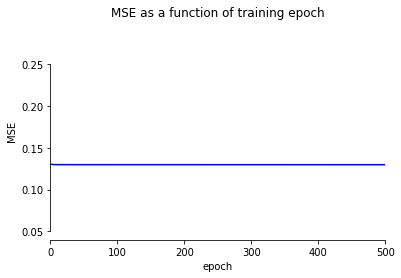

In [ ]:
# define parameters
input = input_patterns
output_pattern = output_patterns_XOR # output_patterns_AND # output_patterns_XOR
learning_rate = 0.3 # learning rate
MSE_threshold = 0.001 # the training stops once the MSE is below this value
max_num_epochs = 500 # maximum number of epochs to train
train_bias = True # if True includes terms allowing bias unit in network
debug = False # set this to True to print relevant variables at each epoch.

# run the network
train2LayerNetwork(input, output_pattern, learning_rate, MSE_threshold, max_num_epochs, train_bias, debug)

#### **Solution (Exercises 1.4 and 1.5)**

In [ ]:
def train2LayerNetwork(input_patterns, output_patterns, learning_rate, MSE_threshold, num_epochs, train_bias=False,
                       debug=False):
    '''
    inputs:
      input_patterns: array of shape (4, 2)
      output_patterns: array of shape (4, 1)
      learning_rate: scalar,
      MSE_threshold: scalar, the training stops once the MSE is below this value
      num_epochs: scalar, maximum number of epochs to train
      train_bias: boolean, if True includes terms allowing bias unit in network
      debug: boolean, if True includes print statements to debug
    output:
      MSE_log: array of shape (1, num_epochs) showing change in network error over training
    '''
    ### network initialization ###

    # let's define the number of input and output units as a function of the dimension of the input and output patterns respectively
    NInputUnits = input_patterns.shape[1]
    NOutputUnits = output_patterns.shape[1]

    # let's also keep a running log of the error of the network
    MSE_log = np.zeros((1, num_epochs))

    # let's initialize the weights between the two layers with small random values, uniformly sampled between 0 and 0.1;
    # the weight matrix will have as many (rows, columns) as (units in the input layer, units in the output layer)
    w = np.random.uniform(0, 0.1, (NInputUnits, NOutputUnits))
    if train_bias:
        # we will also randomly initialize the bias weights to the output layer
        bias = np.random.uniform(0, 0.1, (1, NOutputUnits))

    ### network training ###

    # the network will be trained in epochs.
    for epoch in range(num_epochs):

        # initialize mean squared error log for all patterns
        MSE_patterns = np.zeros((output_patterns.shape[0],))

        # within each training epoch, we will loop through every training pattern.
        for pattern in range(input_patterns.shape[0]):

            # FORWARD PASS #

            # assign values to input layer
            x = np.empty((2,1))
            x[:,0] = input_patterns[pattern,] # x will be a column vector

            # compute net input of output layer using np.dot and x.T
            y_net = np.dot(x.T, w)
            if train_bias:
                y_net = y_net + 1 * bias

            # compute activation of output layer using sigmoidal activation function
            y = 1 / (np.exp(- (y_net)) + 1)

            # ERROR BACKPROPAGATION #

            # compute the mean squared error of the output with respect to the correct training pattern
            t = output_patterns[pattern,]
            MSE_patterns[pattern] = (y - t) ** 2

            # compute derivative of the error ((y - t) ** 2) with respect to the output unit activation
            dError_dAct = (y - t)

            # compute derivative of output unit activation with respect to its net input.
            # Note that the derivative of a sigmoidal function y(x) = 1/(1+exp(-x))
            # is dy/dx = y(x) * (1-y(x))
            dAct_dNet = y * (1 - y)

            # compute the derivative of the net input of the output layer with respect to its weights
            # note: make sure that this derivative is formatted as a column vector
            dNet_dw = x

            if train_bias:
                # compute the derivative of the net input of the output layer with respect to the bias unit
                dNet_dBias = 1

            # compute weight adjustment using dError_dAct, dAct_dNet and dNet_dw
            delta_w = dError_dAct * dAct_dNet * dNet_dw
            if train_bias:
                delta_bias = dError_dAct * dAct_dNet * dNet_dBias

            # For debugging
            if (debug):
                print('----------')
                print(f'pattern: {x}')
                print(f'weights: {w}')
                print(f'output: {y}')
                print(f'MSE - output pattern: {MSE_patterns[pattern]} - {output_patterns[pattern,]}')
                print(f'dError: {dError_dAct}')
                print(f'dAct_dNet: {dAct_dNet}')
                print(f'weight adjustment: {- learning_rate * delta_w}')

            # adjust weights based on learning rate
            w = w - learning_rate * delta_w
            if train_bias:
                bias = bias - learning_rate * delta_bias

        # log mean squared error for current epoch
        MSE_log[0, epoch] = np.sum(MSE_patterns) / MSE_patterns.size

        # break if we error threshold is reached
        if MSE_log[0, epoch] < MSE_threshold:
            break

    # plot the error function
    plt.plot(MSE_log[0,], "b-")
    plt.xlim(0, num_epochs)
    plt.xlabel('epoch')
    plt.ylim(0.04, 0.3)
    plt.yticks([0.05, 0.1, 0.15, 0.2, 0.25])
    plt.ylabel('MSE')
    plt.title('MSE as a function of training epoch')
    sns.despine(trim=True)

**Answer Exercise 1.4**

*   The network fails to learn the AND task because, without a bias unit, it can never produce zero as output, e.g., for the input pattern [0, 0]. This is because, no matter how you set the weights, the net input for the input pattern [0, 0] will always be zero (the weights are multiplied with zero). Thus, the lowest activation that the network can achieve is logistic(0) = 0.5. To correct that, we need to include a trainable offset (bias) in the activation function (see next section).


**Answers Exercise 1.5**
*   The bias adjustment corresponds to
\begin{equation}
\Delta w_{j,b}^t = - \underbrace{\alpha}_\text{learning rate} \cdot\underbrace{\frac{\partial E_{y_1}^t}{\partial w_{j,b}^t}}_\text{derivative w.r.t. bias}
\end{equation}
So "all" we need to do is figure out how to compute $\frac{\partial E_{y_1}^t}{\partial w_{j,b}^t}$. Let's use the chain rule, the same way we did it when we computed the weight adjustments:

\begin{equation}
\frac{\partial E_{y_1}^t}{\partial w_{j,b}^t} = \frac{\partial E_{y_1}^t}{\partial y_{1}} \cdot \frac{\partial y_{1}}{\partial net_{y_1}} \cdot \frac{\partial net_{y_1}}{\partial w_{j,b}^t}
\end{equation}

We know the first two terms from our calculations above:

\begin{equation}
\frac{\partial E_{y_1}^t}{\partial y_{1}} = (y_1 - t_1)
\end{equation}
\begin{equation}
\frac{\partial y_{1}}{\partial net_{y_1}} = y_1 (1 - y_1)
\end{equation}

Now, all that's left is the derrivative of the net input with respect to the bias, $\frac{\partial net_{y_1}}{\partial w_{j,b}^t}$. So let's take a look at the net input:

\begin{equation}
net_{y_1} = w_{1,1} x_1 + w_{1,2} x_2 + \underbrace{b_{y_j} w_{j,b}^t}_\text{bias term}
\end{equation}

Below, we discuss that we treat the bias unit as an input unit that is always set to 1 (it's always turned on), so the equation simplifies to

\begin{equation}
net_{y_1} = w_{1,1} x_1 + w_{1,2} x_2 + 1 \cdot w_{j,b}^t
\end{equation}

This means that $\frac{\partial net_{y_1}}{\partial w_{j,b}^t} = 1$. Now we can compute the entire gradient above:


\begin{aligned}
\frac{\partial E_{y_1}^t}{\partial w_{j,b}^t} &= \frac{\partial E_{y_1}^t}{\partial y_{1}} \cdot \frac{\partial y_{1}}{\partial net_{y_1}} \cdot \frac{\partial net_{y_1}}{\partial w_{j,b}^t} \\
\frac{\partial E_{y_1}^t}{\partial w_{j,b}^t} &= (y_1 - t_1) \cdot y_1 (1 - y_1) \cdot 1
\end{aligned}

This results in the following weight adjustment:

\begin{aligned}
\Delta w_{j,b}^t &= - \alpha \cdot \frac{\partial E_{y_1}^t}{\partial w_{j,b}^t} \\
\Delta w_{j,b}^t &= - \alpha \cdot  (y_1 - t_1) \cdot y_1 (1 - y_1) \cdot 1
\end{aligned}

*   Implementing a trainable bias should improve the network's performance on the AND, as well as the OR rule. However, it should still not be able to learn the XOR rule.

*   Learning the XOR rule requires a non-linear transformation of the input patterns, before the output layer. To accomplish this, we can include a non-linear "hidden layer" between the input and output layers of the network. This hidden layer will help the network learn a non-linear transformation of the input patterns, required to perform the XOR rule.



### The Role of Bias Units



All three boolean functions (AND, OR, XOR) have something in common: They require to map the inputs $[0,0]$ to the output $[0]$. Can our neural network actually learn this mapping? Let's compute the network's output in response to the input pattern $x_1=0, x_2=0$ for any given weights $w_{1,1}, w_{1,2}$:

$net_{y_1} = w_{1,1} x_1 + w_{1,2} x_2 = 0$

$y_1 = \frac{1}{1+e^{(-net_{y_1})}} = \frac{1}{1+e^{(-0)}} = 0.5$.

It turns out that, no matter how we set the weights $w_{1,1}, w_{1,2}$, the network's output will always be 0.5 for the input pattern [0, 0]. This is because the inputs $x_1=0, x_2=0$ lead to $net_{y_1} = 0$, which in turn yields an activation of $y_1 = 0.5$ due to the sigmoidal activation function:

<p align='center'><img src='https://github.com/jmasis/nntutorialmentaleffort2021/blob/a47c4f5fc7eae409c60a63b317a5cce7f92948d6/2LSigmoid.png?raw=True'
alt="2 Layer Network" width=400px height=auto/></p>

What if we could shift the sigmoidal activation function to the right? Then a net input of 0 would yield an activation close to 0.

<p align='center'><img src='https://github.com/jmasis/nntutorialmentaleffort2021/blob/326079df67a7bfe602d30d6aee246b64f53b0f39/BiasEffect.png?raw=True'
alt="Effect of bias on sigmoidal activation function" width=400px height=auto/></p>

Shifting the sigmoidal activation function corresponds to adding a negative bias term to the net input, e.g.,

\begin{equation}
net_{y_1} = w_{1,1} x_1 + w_{1,2} x_2 + \underbrace{-4}_\text{bias term}
\end{equation}

If we substitute in this new definition for $net_{y_1}$, our new output value is

\begin{equation}
y_1 = \frac{1}{1+e^{(-(w_{1,1} x_1 + w_{1,2} x_2 - 4))}} = \frac{1}{1+e^{(4)}} = 0.0180
\end{equation}

Since the sigmmoidal activation function is bounded between 0 and 1, its activation will never be exactly 0 or 1. However, we can get it as close to 0 as possible in order to minimize the error.

#### Learning the bias term

What if we could teach the network to find the right bias to the output unit $y_j$? As shown above, the bias is just an additional term in the net input of a unit. We can therefore treat it as a separate input unit with value $b_{y_j}$ with a weight $w_{j}$ that projects to the output unit $y_j$:

<p align='center'><img src='https://github.com/jmasis/nntutorialmentaleffort2021/blob/326079df67a7bfe602d30d6aee246b64f53b0f39/2LNetworkBias.png?raw=True'
alt="2-layer network with bias unit" width=600px height=auto/></p>

The net input of $y_j$ then amounts to

\begin{equation}
net_{y_1} = w_{1,1} x_1 + w_{1,2} x_2 + \underbrace{b_{y_j} w_{j}}_\text{bias term}
\end{equation}

Now that we have expressed the bias term as another unit with a projection weight to $y_j$, we scan imply set the bias input unit $b_{y_j} = 1$ for every input pattern and let the network learn its weight $w_{j,b}$ in order to find the optimal bias of the network:

\begin{equation}
w_{j,b}^{t+1} = \underbrace{w_{j,b}^t}_\text{current weight} + \underbrace{\Delta w_{j,b}^t}_\text{weight change}
\end{equation}

where

\begin{equation}
\Delta w_{j,b}^t = - \underbrace{\alpha}_\text{learning rate} \cdot\underbrace{\frac{\partial E_{y_1}^t}{\partial w_{j,b}^t}}_\text{derivative w.r.t. bias}
\end{equation}

For simplicity in Exercise 1.5 below, refer to $w_{j,b}^t$ as $\verb|bias|$ and to $\Delta w_{j,b}^t$ as $\verb|delta_bias|$ in the code. Note that any unit (except input units) in the network can have a bias unit. In fact, it is usually the case that every unit of a layer in a network (except input layers) have their own bias units.



### Exercise 1.5



1.   With a pen and paper, use the chain rule in order to figure out how to compute the partial derivative of the error with respect to the bias.
2.   Modify `train2LayerNetwork` to implement a bias unit on the output unit, as well as a mechanism for learning the weight of that bias unit. Once you have modified the code, run the function with `bias = True`.
3.   Check whether implementing a bias unit improves learning on the AND & OR rule compared to having no bias.
4.   Test the network's ability to learn the XOR rule. Why does it still have trouble learning the rule? How could we modify the network even further in order to make it learn the XOR rule?







### The XOR Problem

Why can the network not learn the XOR rule? To gain an intuition for this problem, you can think of our 2-layer neural network as a "linear separator", that classifies the inputs into 0 (red circle) or 1 (blue star), by linearly separating these patterns (formally, this corresponds to the dot product operation when computing the net input of our output unit). This works well for the AND and OR problem, but not so well for the XOR problem.

<p align='center'><img src='https://raw.githubusercontent.com/jmasis/nntutorialmentaleffort2021/main/xor_problem.png'
alt="2-layer network with bias unit" width=600px height=auto/></p>

We may apply a non-linear activation function to the output of our network, but it doesn't help us "warp" the input space in a non-linear manner. To do so, we need another, non-linear intermediate/hidden layer that can help us learn a non-linear transformation of the input space.


<p align='center'><img src='https://raw.githubusercontent.com/jmasis/nntutorialmentaleffort2021/main/xor_solution2.png'
alt="2-layer network with bias unit" width=200px height=auto/></p>

*Fun fact*: Back in the day, when researchers did not know how to train multi-layer non-linear networks, Minsky & Papert published a book called "Perceptrons". The authors showed through a set of analyses that simple, two-layer networks (or multi-layer linear networks) were unable to learn the XOR problem. This led to a pessimistic view on the capability of neural networks, and led researchers to focus on other approaches to AI, in particular symbolic systems.

## Overcoming the AI Winter: Three-Layer Neural Network & Backpropagation

Now we will apply what we learned to a proper *deep neural network* (anything with more than 2 layers is technically a deep net! :)

Recall that earlier we learned that all the steps we applied both in the forward and backward passes could be applied formulaically to any number of layers, not just 2.

As such, take a deep breath, because you already know everything you need to know in order to implement a three-layer neural network.

### Defining a three-layer network

There are many ways we could define a three-layer network. In our case, we are going to keep our input and output layers the same, and just add a layer in between them that we will call a **hidden layer**.

#### Hidden layer, what's that?

A hidden layer is just a fancy term for a layer that is technically not visible to us, meaning it is neither the input (which we know), or the output (which we measure).

We can probe into the network to see what the values of the hidden layer(s) are, but they might be hard to understand. In fact, as networks get bigger and more complex, they become *very* difficult to understand, which is why studying deep neural networks is such an active area of research!

#### Network architecture

Our network takes in 2 input units, spits out 1 output unit, and will have 3 **hidden units**. We will also add bias terms for the hidden layer and the output layer (as before).  

<p align='center'><img src='https://raw.githubusercontent.com/jmasis/nntutorialmentaleffort2021/main/3_layer_network.png'
alt="3-layer network with bias units" width=500px height=auto/></p>




#### Defining the network mathematically

*(<ins>Note</ins>: we will use linear algebra notation to define this 3-layer network because otherwise there would be too many equations. If you are not familiar with notation like this, do not worry! Ignore things like the uppercase$^T$ ("transpose"), and think of everything just as multiplication and addition, which it is. However, note that, in algebra notation, order matters. This means, e.g., that $Wx$ does not equal $xW$ (keep this in mind for Exercise 2.1).*

##### **Connecting the input layer to the hidden layer**

As before, our network takes in some input activity (2 binary values), which we will define as a vector $\bf{x}$ of size (2 x 1).

The vector $\mathbf{x}$ will now be connected to the 3-unit hidden layer, defined by a vector $\mathbf{h}$ of size (3 x 1).

The connection between the vectors $\mathbf{x}$ and $\mathbf{h}$ will be a weight matrix $\mathbf{W}_{h,x}$ of size (3 x 2). That is, the weight matrix $\mathbf{W}_{h,x}$ has 3 rows corresponding to the 3 hidden units and 2 columns corresponding to the two output units.

In addition, we will add a bias term (which we set to 1) to each hidden unit, weighted by a weight matrix $\mathbf{W}_{h,bias}$ of size (3 x 1).

We can now define the net input to the hidden layer $\mathbf{net}_{h}$ of size (3x1),

\begin{equation}
\mathbf{net}_{h} = \mathbf{W}_{h,x} \mathbf{x} + 1\cdot\mathbf{W}_{h,bias}
\end{equation}

Here's an example of how we can express the weights projecting from the input layer to the hidden layer in the form of a matrix:

<p align='center'><img src='https://raw.githubusercontent.com/jmasis/nntutorialmentaleffort2021/main/example_weight_matrix.png'
alt="3-layer network with bias units" width=400px height=auto/></p>

In this case, $\mathbf{W}_{h,x} = \begin{bmatrix} 0.1 & 0.4 \\ 0.2 & 0.5 \\ 0.3 & 0.6 \end{bmatrix}$ and $\mathbf{W}_{h,bias} = \begin{bmatrix} -1 \\ -2 \\ -3 \end{bmatrix}$. Let's assume the input pattern $\mathbf{x} = \begin{bmatrix} 1 \\ 1 \end{bmatrix}$. We can compute the net input of the hidden layer as follows:

\begin{align}
\mathbf{net}_{h} &= \begin{bmatrix} 0.1 & 0.4 \\ 0.2 & 0.5 \\ 0.3 & 0.6 \end{bmatrix} \begin{bmatrix} 1 \\ 1 \end{bmatrix} + 1\cdot \begin{bmatrix} -1 \\ -2 \\ -3 \end{bmatrix}\\
\mathbf{net}_{h} &= \begin{bmatrix} 0.5 \\ 0.7 \\ 0.9 \end{bmatrix} + \begin{bmatrix} -1 \\ -2 \\ -3 \end{bmatrix}\\
\mathbf{net}_{h} &= \begin{bmatrix} -0.5 \\ -1.3 \\ -2.1 \end{bmatrix}
\end{align}

Our hidden layer will also have a logistic activation function, so its activation $\mathbf{h}$ of size (3 x 1) is

\begin{equation}
\mathbf{h} = \frac{1}{1 + e^{-\mathbf{net}_{h}}} \approx \begin{bmatrix} 0 \\ 0 \\ 0.1 \end{bmatrix}
\end{equation}

##### **Connecting the hidden layer to the output layer**

Now, our output layer will be connected to our hidden layer in the same fashion as it was connected to the input layer in the 2-layer network.

Our output layer is a 1-unit vector $\mathbf{y}$ of size (1 x 1) (so just a number), connected to the hidden layer $\mathbf{h}$ of size (3 x 1), by a weight matrix $\mathbf{W}_{y,h}$ of size (1 x 3).

In addition, we will add a bias term (which we set to 1) to the output unit, weighted by a weight matrix $\mathbf{W}_{y,bias}$ of size (1 x 1) (so just a number too).

We can now define the net input to the output layer $\mathbf{net}_{y}$ of size (1x1),

\begin{equation}
\mathbf{net}_{y} = \mathbf{W}_{y,h} \mathbf{h} + 1\cdot\mathbf{W}_{y,bias}
\end{equation}

Again, let's consider the following example weights projecting from the hidden to the output layer:

<p align='center'><img src='https://raw.githubusercontent.com/jmasis/nntutorialmentaleffort2021/main/example_hidden_output.png'
alt="3-layer network with bias units" width=400px height=auto/></p>


with $\mathbf{W}_{y,h} = \begin{bmatrix} 0.1  & 0.2  & 0.3 \end{bmatrix}$ and $\mathbf{W}_{y,bias} = \begin{bmatrix} 4 \end{bmatrix}$. With this setup, the net input of the output unit amounts to

\begin{equation}
\mathbf{net}_{y} = \begin{bmatrix} 0.1  & 0.2  & 0.3 \end{bmatrix} \begin{bmatrix} 0 \\ 0 \\ 0.1 \end{bmatrix} + \begin{bmatrix} 4 \end{bmatrix} = \begin{bmatrix} 4.3 \end{bmatrix}
\end{equation}

And like before, we have a sigmoid activation function, so its activation $\mathbf{y}$ of size (1 x 1) is

\begin{equation}
\mathbf{y} = \frac{1}{1 + e^{-\mathbf{net}_{y}}} = 0.9866
\end{equation}

##### **Remarks**

As you may see, adding a third layer was just repeating what we already learned in the 2-layer example. As networks get larger and fancier, we can change the activation functions and bias terms used for every layer, and how connected they are through the weight matrices.

*You now have the building blocks to understand the principles behind most neural networks!*

You may have heard of fancy names applied to some neural networks, but you should be able to understand more or less how they work now based on this workshop. In the case of "recurrent neural networks," we just connect layers back to each other. For example, imagine that there were two hidden layers and the activity of the second one fed back into the first one in a loop. In the case of "convolutional neural networks," we just apply a special mathematical function called a convolution (think: averaging with a sliding window) to connect a big layer with a much smaller layer. For example, imagine that the input layer was not just 2 numbers, but rather an image, so a matrix of 256 x 256 numbers. We could connect it to the much smaller hidden layer via a convolution.


#### Backpropagation in 3-layer network

##### **Determining which weights to learn**

Backpropagating over the 3-layer network follows the same rules we followed for the 2-layer network, we just have more weights to learn now.

Specifically, we would like to learn four sets of weights,


1.   $\mathbf{W}_{h,x}$ : the weights between the input and hidden layers
2.   $\mathbf{W}_{h,bias}$ : the weights between the hidden layer bias and hidden layer
3.   $\mathbf{W}_{y,h}$ : the weights between the output and hidden layers
4.   $\mathbf{W}_{y, bias}$: the weight between the output layer bias and the output layer

To do this, we will do as before, and take the derivative of the error function **with respect to each of those weights**. As such, we have four derivatives we need to calculate,


\begin{equation}
\frac{\partial E_{\mathbf{y}}^t}{\partial \mathbf{W}_{h,x}^t},
\frac{\partial E_{\mathbf{y}}^t}{\partial \mathbf{W}_{h,bias}^t},
\frac{\partial E_{\mathbf{y}}^t}{\partial \mathbf{W}_{y,h}^t},
\frac{\partial E_{\mathbf{y}}^t}{\partial \mathbf{W}_{y,bias}^t}
\end{equation}



##### **Chain rule, we meet again**

The next step is to use the chain rule on each of these to calculate the derivative. We can do this by following the functions back to each of the weights, as we did before.

Let's begin with derivative of the error function with respect to the weights of the input to the hidden layer, $\frac{\partial E_{\mathbf{y}}^t}{\partial \mathbf{W}_{h,x}^t}$. We have five nested functions connecting the error function to these weights:

\begin{eqnarray}
E_{\mathbf{y}} &=& \frac{1}{2}(\mathbf{y} - \mathbf{t})^2 \\
\mathbf{y} &=& \frac{1}{1 + e^{-\mathbf{net}_{y}}}\\
\mathbf{net}_{y} &=& \mathbf{W}_{y,h} \mathbf{h} + 1\cdot\mathbf{W}_{y,bias}\\
\mathbf{h} &=& \frac{1}{1 + e^{-\mathbf{net}_{h}}}\\
\mathbf{net}_{h} &=& \mathbf{W}_{h,x} \mathbf{x} + 1\cdot\mathbf{W}_{h,bias}
\end{eqnarray}

We should therefore have five partial derivatives when we apply the chain rule,

\begin{equation}
\frac{\partial E_{\mathbf{y}}^t}{\partial \mathbf{W}_{h,x}^t} =
\frac{\partial E_{\mathbf{y}}^t}{\partial \mathbf{y}}
\frac{\partial \mathbf{y}}{\partial \mathbf{net}_{y}}
\frac{\partial \mathbf{net}_{y}}{\partial \mathbf{h}}
\frac{\partial \mathbf{h}}{\partial \mathbf{net}_{h}}
\frac{\partial \mathbf{net}_{h}}{\partial \mathbf{W}_{h,x}^t}
\end{equation}

For the derivative with respect to the bias weights of the hidden layer, $\frac{\partial E_{\mathbf{y}}^t}{\partial \mathbf{W}_{h,bias}^t}$, we have the same nested functions as above, but we just need to change the last term,

\begin{equation}
\frac{\partial E_{\mathbf{y}}^t}{\partial \mathbf{W}_{h,bias}^t} =
\frac{\partial E_{\mathbf{y}}^t}{\partial \mathbf{y}}
\frac{\partial \mathbf{y}}{\partial \mathbf{net}_{y}}
\frac{\partial \mathbf{net}_{y}}{\partial \mathbf{h}}
\frac{\partial \mathbf{h}}{\partial \mathbf{net}_{h}}
\frac{\partial \mathbf{net}_{h}}{\partial \mathbf{W}_{h,bias}^t}
\end{equation}

For the derivative of the weights connecting the hidden layer and output layer, we just need to apply the chain rule to the first three equations, instead of all five,

\begin{equation}
\frac{\partial E_{\mathbf{y}}^t}{\partial \mathbf{W}_{y,h}^t} =
\frac{\partial E_{\mathbf{y}}^t}{\partial \mathbf{y}}
\frac{\partial \mathbf{y}}{\partial \mathbf{net}_{y}}
\frac{\partial \mathbf{net}_{y}}{\partial \mathbf{W}_{y,h}^t}
\end{equation}

And similarly for the bias on the output layer,

\begin{equation}
\frac{\partial E_{\mathbf{y}}^t}{\partial \mathbf{W}_{y,bias}^t} =
\frac{\partial E_{\mathbf{y}}^t}{\partial \mathbf{y}}
\frac{\partial \mathbf{y}}{\partial \mathbf{net}_{y}}
\frac{\partial \mathbf{net}_{y}}{\partial \mathbf{W}_{y,bias}^t}
\end{equation}

Phew! From here on out, we just need to calculate each of the derivatives separately. Notice that the first two partial derivatives are the same for all four expressions, they are:

<!-- Verbose:

\begin{equation}
\frac{\partial E_{\mathbf{y}}^t}{\partial \mathbf{y}} =  
\frac{\partial}{\partial \mathbf{y}} 0.5(\mathbf{y} - \mathbf{t})^2 = (\mathbf{y} - \mathbf{t})
\end{equation}

\begin{equation}
\frac{\partial \mathbf{y}}{\partial \mathbf{net}_{y}} = \frac{\partial}{\partial \mathbf{net}_{y}} \frac{1}{1 + e^{-\mathbf{net}_{y}}} = \mathbf{y}(1 - \mathbf{y})
\end{equation} -->

\begin{equation}
\frac{\partial E_{\mathbf{y}}^t}{\partial \mathbf{y}} = (\mathbf{y} - \mathbf{t})
\end{equation}

\begin{equation}
\frac{\partial \mathbf{y}}{\partial \mathbf{net}_{y}} = \mathbf{y}(1 - \mathbf{y})
\end{equation}

The rest of the partial derivatives we need are:

\begin{eqnarray}
\frac{\partial \mathbf{net}_{y}}{\partial \mathbf{h}} &=& \mathbf{W}_{y,h}^T \\
\frac{\partial \mathbf{h}}{\partial \mathbf{net}_{h}} &=& \mathbf{h}(1 - \mathbf{h}) \\
\frac{\partial \mathbf{net}_{h}}{\partial \mathbf{W}_{h,x}^t} &=& \mathbf{x^T} \\
\frac{\partial \mathbf{net}_{y}}{\partial \mathbf{W}_{y,h}^t} &=& \mathbf{h^T} \\
\frac{\partial \mathbf{net}_{h}}{\partial \mathbf{W}_{h,bias}^t} &=& 1 \\
\frac{\partial \mathbf{net}_{y}}{\partial \mathbf{W}_{y,bias}^t} &=& 1 \\
\end{eqnarray}

##### **Updating the weights**

Recall from earlier, that we update the weights by adding a small change,

\begin{equation}
\mathbf{W}^{t+1} = \underbrace{\mathbf{W}^t}_\text{current weight} + \underbrace{\Delta \mathbf{W}^t}_\text{weight change}
\end{equation}

where that small change is the learning rate $\alpha$ times the partial derivative of the error with respect to those weights,

\begin{equation}
\Delta \mathbf{W}^t = - \underbrace{\alpha}_\text{learning rate} \cdot\underbrace{\frac{\partial E_{\mathbf{y}}^t}{\partial \mathbf{W}^t}}_\text{derivative w.r.t. some weights}
\end{equation}

We can put all the pieces together in order to compute the weight changes for all four sets of weights,

\begin{equation}
\Delta \mathbf{W}_{h,x}^t = - \alpha (\mathbf{y} - \mathbf{t}) \mathbf{y} (1 - \mathbf{y}) \mathbf{W}_{y,h}^T \mathbf{h} (1 - \mathbf{h})\mathbf{x^T}
\end{equation}

\begin{equation}
\Delta \mathbf{W}_{h,bias}^t = - \alpha (\mathbf{y} - \mathbf{t}) \mathbf{y} (1 - \mathbf{y}) \mathbf{W}_{y,h}^T \mathbf{h} (1 - \mathbf{h})
\end{equation}

\begin{equation}
\Delta \mathbf{W}_{y,h}^t = - \alpha (\mathbf{y} - \mathbf{t}) \mathbf{y} (1 - \mathbf{y}) \mathbf{h^T}
\end{equation}

\begin{equation}
\Delta \mathbf{W}_{y,bias}^t = - \alpha (\mathbf{y} - \mathbf{t}) \mathbf{y} (1 - \mathbf{y})
\end{equation}

*We did it!* Now we can write a function to simulate the 3-layer network.

### Exercise 2.1

The function `train3LayerNetwork` initializes a 3-layer neural network with 2 input units and 1 output unit (like in the example above). Your task is to fill in the missing code for the computation of its output (forward pass), as well as the missing code for network training (backward pass). The missing code is marked with '`...`'.

Once you completed the code, run the simulation below. The simulation will output for each learning epoch (1 forward pass and 1 backward pass on every training pattern) the mean squared error across all training patterns. If your implementation is correct, then the network should be able to learn the XOR task.

Once the network learns the XOR task, answer the following questions:

*   Compare the learning curves for the AND/OR training patterns against the learning curve for the XOR training pattern. What do you observe? Can you explain the difference in the learning curves?
*   Change the weight initialization from $W_{h,x},W_{y,h} \sim U(0,1)$ to $W_{h,x},W_{y,h} \sim U(0,0.1)$ and re-run the simulation. What happens? Now change the number of maximum learning epochs from 2,000 to 20,000. Can you explain why the difference in learning dynamics between the two weight initializations?



#### Define function 'train3LayerNework'

In [ ]:
def train3LayerNetwork(input_patterns, output_patterns, learning_rate, MSE_threshold, num_epochs):
    ### network initialization ###

    # let's define the number input and output units as a function of the dimension of the input and output patterns respectively
    NInputUnits = input_patterns.shape[1]
    NOutputUnits = output_patterns.shape[1]
    # set number of hidden units to 3
    NHiddenUnits = 3

    # now we can intialize the two layers of the network...
    x = np.zeros((1, NInputUnits))  # input layer
    h = np.zeros((1, NHiddenUnits))  # hidden layer
    y = np.zeros((1, NOutputUnits))  # output layer

    # let's also log the error of the network
    MSE_log = np.zeros((1, num_epochs))

    # initialize weights from input layer to the hidden layer
    W_hx = np.random.uniform(0, 1, (h.shape[1], x.shape[1]))

    # initialize weights from hidden layer to the output layer
    W_yh = np.random.uniform(0, 1, (y.shape[1], h.shape[1]))

    # initialize weights from bias unit to hidden layer and output layer
    W_hbias = np.random.uniform(0, 1, (h.shape[1], 1))
    W_ybias = np.random.uniform(0, 1, (y.shape[1], 1))

    W_hbias[:, 0] = -2
    W_ybias[:, 0] = -2

    ### network training ###

    # the network will be trained in epochs.
    for epoch in range(num_epochs):

        # initialize mean squared error log for all patterns
        MSE_patterns = np.zeros((output_patterns.shape[0],))

        # shuffle input patterns
        # np.random.shuffle(input_patterns)

        # within each training epoch, we will loop through every training pattern.
        for pattern in range(input_patterns.shape[0]):
            # FORWARD PASS #

            # assign values to input layer
            x = np.empty((2, 1))
            x[:,0] = input_patterns[pattern,]

            # compute net input of hidden layer
            hbias = 1 * W_hbias
            h_net = ... # YOUR CODE (hint: use np.dot)

            # compute activation of hidden layer using sigmoidal activation function
            h = ... # YOUR CODE (hint: use np.exp)

            # compute net input of output layer
            ybias = 1 * W_ybias
            y_net = ...  # YOUR CODE (hint: use np.dot)

            # compute activation of output layer using sigmoidal activation function
            y = ...  # YOUR CODE (hint: use np.exp)

            # ERROR BACKPROPAGATION #

            # compute the mean squared error of the output with respect to the correct training pattern
            MSE_patterns[pattern] = (y - output_patterns[pattern,]) ** 2

            # DERIVATIVES

            # compute derivative of the error with respect to the output unit activation
            dError_dAct_y = (y - output_patterns[pattern,])

            # compute derivative of output unit activation with respect to it's net input.
            dAct_y_dNet_y = y * (1 - y)

            # compute derivative of output unit activation with respect to the net input
            dError_dNet_y = dError_dAct_y * dAct_y_dNet_y

            # compute derivative of the output unit's net input with respect to the hidden unit activations
            dNet_y_d_Act_h = W_yh.T

            # compute derivative of the hidden unit activations with respect to the hidden units' net input
            dAct_h_dNet_h = h * (1 - h)

            # compute derivative of the error with respect to the hidden units' net input
            dError_dNet_h = dError_dNet_y * np.multiply(dNet_y_d_Act_h, dAct_h_dNet_h)

            # compute derivative of the hidden units' net input with respect to the input-hidden weights
            dNet_h_dx = x.T

            # compute the derivative of the output unit's net input with respect to hidden-output weights
            dNet_h_dW_yh = h.T

            # compute the derivative of the net input of the output unit with respect to it's weights to the bias unit
            dNet_y_dW_ybias = 1

            # compute the derivative of the net input of the hidden units with respect to their weights to the bias unit
            dNet_h_dW_hbias = 1

            # WEIGHT UPDATES

            # compute weight adjustments from the hidden layer to the output layer
            delta_W_yh = ... # YOUR CODE

            # compute weight adjustments from the bias unit to the output layer
            delta_W_ybias = ... # YOUR CODE

            # compute weight adjustments from the input layer to the hidden layer
            delta_W_hx = ... # YOUR CODE (hint: use dError_dNet_h)

            # compute weight adjustments from the bias unit to the hidden layer
            delta_W_hbias = ... # YOUR CODE (hint: use dError_dNet_h)

            # adjust weights to output layer
            W_yh = W_yh - ... # YOUR CODE
            W_ybias = W_ybias - ... # YOUR CODE

            # adjust weights to hidden layer
            W_hx = W_hx - ... # YOUR CODE
            W_hbias = W_hbias - ... # YOUR CODE

        # log mean squared error for current epoch
        MSE_log[0, epoch] = np.sum(MSE_patterns) / MSE_patterns.size

        # break if we error threshold is reached
        if MSE_log[0, epoch] < MSE_threshold:
            break

    # plot the error function
    plt.plot(MSE_log[0,], '-b')
    plt.xlim(0, num_epochs)
    plt.xlabel('epoch')
    plt.ylim(0.001, 0.3)
    plt.yticks([0.01, 0.05, 0.1, 0.15, 0.2, 0.25])
    plt.ylabel('MSE')
    plt.title('MSE as a function of training epoch')
    sns.despine(trim=True)

#### Run simulation

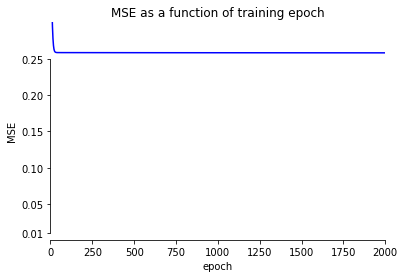

In [ ]:
# define parameters
input = input_patterns
output_pattern = output_patterns_XOR # output_patterns_OR # output_patterns_AND
learning_rate = 0.5 # learning rate
MSE_threshold = 0.01 # the training stops once the MSE is below this value
num_epochs = 2000 # maximum number of epochs to train

# run the network
train3LayerNetwork(input, output_pattern, learning_rate, MSE_threshold, num_epochs)

#### **Solution**

In [ ]:
def train3LayerNetwork(input_patterns, output_patterns, learning_rate, MSE_threshold, num_epochs):
    ### network initialization ###

    # let's define the number input and output units as a function of the dimension of the input and output patterns respectively
    NInputUnits = input_patterns.shape[1]
    NOutputUnits = output_patterns.shape[1]
    # set number of hidden units to 3
    NHiddenUnits = 3

    # now we can intialize the two layers of the network...
    x = np.zeros((1, NInputUnits))  # input layer
    h = np.zeros((1, NHiddenUnits))  # hidden layer
    y = np.zeros((1, NOutputUnits))  # output layer

    # let's also log the error of the network
    MSE_log = np.zeros((1, num_epochs))

    # initialize weights from input layer to the hidden layer
    W_hx = np.random.uniform(0, 1, (h.shape[1], x.shape[1]))

    # initialize weights from hidden layer to the output layer
    W_yh = np.random.uniform(0, 1, (y.shape[1], h.shape[1]))

    # initialize weights from bias unit to hidden layer and output layer
    W_hbias = np.random.uniform(0, 1, (h.shape[1], 1))
    W_ybias = np.random.uniform(0, 1, (y.shape[1], 1))

    W_hbias[:, 0] = -2
    W_ybias[:, 0] = -2

    ### network training ###

    # the network will be trained in epochs.
    for epoch in range(num_epochs):

        # initialize mean squared error log for all patterns
        MSE_patterns = np.zeros((output_patterns.shape[0],))

        # shuffle input patterns
        # np.random.shuffle(input_patterns)

        # within each training epoch, we will loop through every training pattern.
        for pattern in range(input_patterns.shape[0]):
            # FORWARD PASS #

            # assign values to input layer
            x = np.empty((2, 1))
            x[:,0] = input_patterns[pattern,]

            # compute net input of hidden layer
            hbias = 1 * W_hbias
            h_net = np.dot(W_hx, x) + hbias # YOUR CODE (hint: use np.dot)

            # compute activation of hidden layer using sigmoidal activation function
            h = 1 / (np.exp(- (h_net)) + 1)  # YOUR CODE (hint: use np.exp)

            # compute net input of output layer
            ybias = 1 * W_ybias
            y_net = np.dot(W_yh, h) + ybias  # YOUR CODE (hint: use np.dot)

            # compute activation of output layer using sigmoidal activation function
            y = 1 / (np.exp(- (y_net)) + 1)  # YOUR CODE (hint: use np.exp)

            # ERROR BACKPROPAGATION #

            # compute the mean squared error of the output with respect to the correct training pattern
            MSE_patterns[pattern] = (y - output_patterns[pattern,]) ** 2

            # DERIVATIVES

            # compute derivative of the error with respect to the output unit activation
            dError_dAct_y = (y - output_patterns[pattern,])

            # compute derivative of output unit activation with respect to it's net input.
            dAct_y_dNet_y = y * (1 - y)

            # compute derivative of output unit activation with respect to the net input
            dError_dNet_y = dError_dAct_y * dAct_y_dNet_y

            # compute derivative of the output unit's net input with respect to the hidden unit activations
            dNet_y_d_Act_h = W_yh.T

            # compute derivative of the hidden unit activations with respect to the hidden units' net input
            dAct_h_dNet_h = h * (1 - h)

            # compute derivative of the error with respect to the hidden units' net input
            dError_dNet_h = dError_dNet_y * np.multiply(dNet_y_d_Act_h, dAct_h_dNet_h)

            # compute derivative of the hidden units' net input with respect to the input-hidden weights
            dNet_h_dx = x.T

            # compute the derivative of the output unit's net input with respect to hidden-output weights
            dNet_h_dW_yh = h.T

            # compute the derivative of the net input of the output unit with respect to it's weights to the bias unit
            dNet_y_dW_ybias = 1

            # compute the derivative of the net input of the hidden units with respect to their weights to the bias unit
            dNet_h_dW_hbias = 1

            # WEIGHT UPDATES

            # compute weight adjustments from the hidden layer to the output layer
            delta_W_yh = dError_dNet_y * dNet_h_dW_yh # YOUR CODE

            # compute weight adjustments from the bias unit to the output layer
            delta_W_ybias = dError_dNet_y * dNet_y_dW_ybias # YOUR CODE

            # compute weight adjustments from the input layer to the hidden layer
            delta_W_hx = dError_dNet_h * dNet_h_dx # YOUR CODE (hint: use dError_dNet_h)

            # compute weight adjustments from the bias unit to the hidden layer
            delta_W_hbias = dError_dNet_h * dNet_h_dW_hbias # YOUR CODE (hint: use dError_dNet_h)

            # adjust weights to output layer
            W_yh = W_yh - learning_rate * delta_W_yh # YOUR CODE
            W_ybias = W_ybias - learning_rate * delta_W_ybias # YOUR CODE

            # adjust weights to hidden layer
            W_hx = W_hx - learning_rate * delta_W_hx # YOUR CODE
            W_hbias = W_hbias - learning_rate * delta_W_hbias # YOUR CODE

        # log mean squared error for current epoch
        MSE_log[0, epoch] = np.sum(MSE_patterns) / MSE_patterns.size

        # break if we error threshold is reached
        if MSE_log[0, epoch] < MSE_threshold:
            break

    # plot the error function
    plt.plot(MSE_log[0,], '-b')
    plt.xlim(0, num_epochs)
    plt.xlabel('epoch')
    plt.ylim(0.001, 0.3)
    plt.yticks([0.01, 0.05, 0.1, 0.15, 0.2, 0.25])
    plt.ylabel('MSE')
    plt.title('MSE as a function of training epoch')
    sns.despine(trim=True)

**Answers**

*   When comparing the learning curves for the AND/OR and the XOR condition, you should observe that the network requires fewer training iterations to learn AND/OR compared to XOR. Moreover, you may also observe a two-stage learning curve for the XOR condition in which learning slows down and then accelerates again. This reflects an additional adjustment of the input-hidden weights that is required to learn the XOR rule. First, the network learns to adjust the hidden-output weights to reduce the error—this already sufficient to learn the OR/AND rule. However, to learn the XOR rule, the network needs to learn a non-linear mapping of the input space, thus, requiring an additional adjustment of the input-hidden weights (reflected in the second acceleration of the learning curve). Such stage-like transitions in the learning curve can explain developmental transitions in semantic cognition (Saxe, Ganguli, McClelland, 2019).
*   When the network is initialized with smaller weights, its gradient updates end up being fairly small (due to the small derivatives). Thus, the network requires more iterations for training. This small exercise demonstrates that weight initialization matters. In fact, a good chunk of machine learning research is concerned with identifying good initialization conditions.

## A Neural Network Model of Mental Effort

Now that you are equipped with a basic understanding of neural networks, you might wonder how you can use these kind of modeling too to understand mechanisms underlying mental effort? In this section, we will introduce a neural network model of mental effort, called the **Stroop model** (Cohen, Dunbar, & McClelland, 1990).

### Performance in the Stroop Task as a Measure of Mental Effort

The Stroop model operationalizes mental effort as cognitive control, that is, our ability to override habitual responses in order to align behavior with current task goals. For instance, you may be familiar with the so-called Stroop task in which participants have to name the color of a color word, e.g., say "green" in response to:

<font color="green" size=13> **RED** </font>

We call this stimulus "incongruent" because the color and the word are associated with different responses. A congruent stimulus looks like this:

<font color="green" size=13> **GREEN** </font>

Finally, there may be so-called neutral stimuli in which the participant has to respond to the color of a non-word:

<font color="green" size=13> **XXXX** </font>

When studying human performance in the Stroop task, one can measure the error rate as a function of stimulus condition (neutral, incongruent, congruent), and as function of which task the participant performs (color naming or word reading). Human performance matches qualitatively this pattern:

<p align='center'><img src='https://raw.githubusercontent.com/jmasis/nntutorialmentaleffort2021/main/stroop_results.png'
alt="3-layer network with bias units" width=300px height=auto/></p>

That is, cognitive psychologists found that participants make fewer errors when being asked to respond to the word (performing the *word reading task*) compared to responding to the color (performing the *color naming task*). Thus, researchers assumed that word reading requires less mental effort (cognitive control) than color naming. In addition, participants make fewer errors when color naming to congruent relative to incongruent stimuli, irrespective of the task. Analogously, researchers hypothesized that congruent stimuli require less mental effort (cognitive control) than incongruent stimuli.

### The Stroop Model

To explain these effects, Cohen et al. (1990) came up with a neural network model that operationalizes mental effort. The model looks like this (adapted from Figure 1 of Cohen et al, 1990):

<p align='center'><img src='https://raw.githubusercontent.com/jmasis/nntutorialmentaleffort2021/main/stroop_neural_network_simple.png'
alt="3-layer network with bias units" width=500px height=auto/></p>


The network consists of three input layers, two hidden layers and one output layer. The input layer on the left encodes the ink color of the stimulus. For instance, if the stimulus was shown in green red, we may set the input vector for the INK COLOR layer to $\begin{bmatrix} 1 & 0 \end{bmatrix}$. The input layer on the right encodes the current word. For instance, if the word would is "GREEN" then we can set the word input layer to $\begin{bmatrix} 0 & 1 \end{bmatrix}$. Finally, the input layer in the middle encodes the task to be performed on the two stimuli. For instance, if the participant would be asked to perform the color naming task, one would set the input units of the task demand layer to $\begin{bmatrix} 1 & 0 \end{bmatrix}$.

The input layers project to two hidden layers, one that represents colors and another one that represents words. E.g., the first unit in the color hidden layer represents the color green. Note that inhibitory connections (negative weights) are depicted as dashed arrows. Finally, both hidden layers project to respective response units in the output layer.

Note that the output layer receives inputs from two sources, the color hidden layer and the word hidden layer. Thus, if the information represented in the color and word hidden layers is incongruent, then the output layer will receive conflicting responses. However, an important feature of the Stroop model is that the hidden and output units are inhibited at rest. That is, these units receive a negative weight from a bias unit. Thus, a more accurate depiction of the network would be:

<p align='center'><img src='https://raw.githubusercontent.com/jmasis/nntutorialmentaleffort2021/main/stroop_neural_network.png'
alt="3-layer network with bias units" width=500px height=auto/></p>

where the green units are bias units. The inhibition is so strong that, without any input from the *TASK DEMAND* layer, the information from the color and word input layers would not "make it through" the hidden layers to the output layer. This is because adding a negative bias pushes the non-linear activation function to the right (see section "The Role of Bias Units" above).

<p align='center'><img src='https://github.com/jmasis/nntutorialmentaleffort2021/blob/326079df67a7bfe602d30d6aee246b64f53b0f39/BiasEffect.png?raw=True'
alt="Effect of bias on sigmoidal activation function" width=400px height=auto/></p>

As a consequence, small net inputs will evaluate to something close to zero. However, the cool part about the Stroop model is that the *TASK DEMAND* layer can provide additional net input to the hidden units, making it possible to disinhibit them. For instance, if we set the color naming unit to 1, then we can provide additonal net input to the color hidden units. This negates the negative bias, allowing information from the *INK COLOR* input layer to flow through to the *RESPONSE* layer. Conversely, if we leave the word reading unit in the *TASK DEMAND* layer at 0, then the information from the *WORD* layer cannot leak through. The output layer would then only receive input from the color hidden units, thus enabling the network to perform the color naming task. This provides a mechanism for mental effort: allocating mental effort to a task means to activate a task demand unit (i.e., set it to 1).

Now lets look into an actual implementation of the Stroop model...


The following function "**runStroopNetwork**" implements the Stroop model. Note that the weights are denoted as "W_source_layer_target_layer". However, the weights are not yet defined—this is OK! Defining the weights will be part of an exercise that we will come to later. For now, let's just execute the function below and have a closer look...

In [ ]:
# this function accepts a single input pattern for the color, word and task input layers
# and produces a response at the output layer.
def runStroopNetwork(color_input, word_input, task_input):

    # compute activation of color hidden layer
    net_hidden_color = np.dot(color_input, W_input_color_hidden_color) + \
                       np.dot(task_input, W_input_task_hidden_color) + \
                       bias

    act_hidden_color = 1 / (1 + np.exp(-net_hidden_color))

    # compute activation of word hidden layer
    net_hidden_word = np.dot(word_input, W_input_word_hidden_word) + \
                      np.dot(task_input, W_input_task_hidden_word) + \
                      bias

    act_hidden_word = 1 / (1 + np.exp(-net_hidden_word))

    # compute activation of output layer
    net_output = np.dot(act_hidden_color, W_hidden_color_output) + \
                 np.dot(act_hidden_word, W_hidden_word_output)

    act_output = 1 / (1 + np.exp(-net_output))

    # We apply the softmax function convert the output activation for each unit (response) into a probability
    response_probability = np.exp(net_output) / np.sum(np.exp(net_output), axis=1)

    return response_probability

You may notice that the network is not very special, at least computationally: It performs the same net input integration, anf non-linear activation functions as the networks in the previous sections. There are only three things that make this network special compared to the network above:


1.   It has more than one output unit.
2.   It has multiple (3) input layers and multiple (2) hidden layers.
3.   It uses a softmax function at the output layer.

The first two points aren't really new, since they are simple extensions of the formalism introduced above; So let's have a look at the computation of the output layer...

The response probabilities of the network are computed as follows:

\begin{align}
P(\text{red}) &= \frac{e^{net_{\text{output},red}}}{e^{net_{\text{output},red}} + e^{net_{\text{output},green}}} \\
P(\text{green}) = 1 - P(\text{red}) &= \frac{e^{net_{\text{output},green}}}{e^{net_{\text{output},red}} + e^{net_{\text{output},green}}}
\end{align}

This function is called the **softmax** function. All it does is that it forces the activities for both output units to sum up to 1. Thus, we can treat them as probabilities. The response probability for each unit is proportional to its respective net input, weighted by the net input of the other unit.

OK, now that we have a Stroop model, we need an experiment environment. The following function "**runStroopExperiment**" probes the network's response for different Stroop conditions (see the code below). For now, let's just execute the function so we can call it later...





In [ ]:
# computes the network's error rate across different conditions

def runStroopExperiment():
    # color naming, congruent stimulus
    color_input = np.array([[1, 0]])    # color: red
    word_input = np.array([[1, 0]])     # word: red
    task_input = np.array([[1, 0]])     # task: color naming
    cn_congruent = runStroopNetwork(color_input, word_input, task_input)

    # color naming, incongruent stimulus
    color_input = np.array([[1, 0]])    # color: red
    word_input = np.array([[0, 1]])     # word: green
    task_input = np.array([[1, 0]])     # task: color naming
    cn_incongruent = runStroopNetwork(color_input, word_input, task_input)

    # color naming, neutral stimulus
    color_input = np.array([[1, 0]])    # color: red
    word_input = np.array([[0, 0]])     # word: XXX
    task_input = np.array([[1, 0]])     # task: color naming
    cn_neutral = runStroopNetwork(color_input, word_input, task_input)

    # word reading, congruent stimulus
    color_input = np.array([[1, 0]])    # color: red
    word_input = np.array([[1, 0]])     # word: red
    task_input = np.array([[0, 1]])     # task: word reading
    wr_congruent = runStroopNetwork(color_input, word_input, task_input)

    # word reading, incongruent stimulus
    color_input = np.array([[0, 1]])    # color: green
    word_input = np.array([[1, 0]])     # word: red
    task_input = np.array([[0, 1]])     # task: word reading
    wr_incongruent = runStroopNetwork(color_input, word_input, task_input)

    # word reading, neutral stimulus
    color_input = np.array([[0, 0]])    # color: red
    word_input = np.array([[1, 0]])     # word: red
    task_input = np.array([[0, 1]])     # task: word reading
    wr_neutral = runStroopNetwork(color_input, word_input, task_input)

    # plot error rates for each condition (assuming "red" is the correct response)
    cn_congruent_error_rate = 1 - cn_congruent[0, 0]
    cn_incongruent_error_rate = 1 - cn_incongruent[0, 0]
    cn_neutral_error_rate = 1 - cn_neutral[0, 0]
    wr_congruent_error_rate = 1 - wr_congruent[0, 0]
    wr_incongruent_error_rate = 1 - wr_incongruent[0, 0]
    wr_neutral_error_rate = 1 - wr_neutral[0, 0]

    return (cn_congruent_error_rate, cn_incongruent_error_rate, cn_neutral_error_rate,
            wr_congruent_error_rate, wr_incongruent_error_rate, wr_neutral_error_rate)

### Exercise 3.1

Now that we have a Stroop model and a Stroop experiment, let's see how it behaves. The following code section defines the weights for the Stroop model and measures its performance. Execute the code block and see what happens.
Does the network produce the expected behavior? Well, of course not, otherwise this wouldn't be an exercise. Now, can you adjust the weights of the Stroop model so that it produces behavior similar to the figure shown above?

Open ended exercise: A major tenet of the Stroop model is that the word reading task requires less effort because it's processing path from the input to the output layer is stronger, as a consequence of training (lifelong practice on word reading as opposed to color naming). Wouldn't it be nice if we could show that this behavior results indeed from training? To do so, you may want to think tacke two extended exercises:


1.   Apply the backpropagation algorithm to make the Stroop network trainable.
2.   Train the Stroop network on a higher proportion of word reading conditions than color naming conditions. Can you replicate the behavioral pattern expected in the Stroop task?



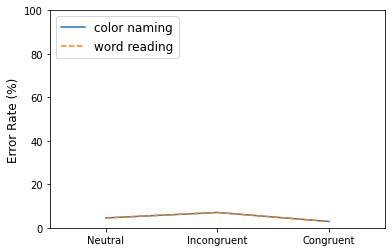

In [ ]:
# STROOP NETWORK WEIGHTS

bias = -4

# weights projecting from color input layer to color hidden layer
W_input_color_hidden_color = 2 * np.array([[1, -1],   # EXPERIMENT WITH THESE WEIGHTS
                                             [-1, 1]])

# weights projecting from color hidden layer to output layer
W_hidden_color_output = 2 * np.array([[1, -1],    # EXPERIMENT WITH THESE WEIGHTS
                                        [-1, 1]])

# weights projecting from word input layer to word hidden layer
W_input_word_hidden_word = 2 * np.array([[1, -1],   # EXPERIMENT WITH THESE WEIGHTS
                                           [-1, 1]])

# weights projecting from word hidden layer to output layer
W_hidden_word_output = 2 * np.array([[1, -1],   # EXPERIMENT WITH THESE WEIGHTS
                                      [-1, 1]])

# weights projecting from task layer to color hidden layer
W_input_task_hidden_color = 4.0 * np.array([[1, 1],   # EXPERIMENT WITH THESE WEIGHTS
                                            [0, 0]])

# weights projecting from task layer to word hidden layer
W_input_task_hidden_word = 4.0 * np.array([[0, 0],    # EXPERIMENT WITH THESE WEIGHTS
                                           [1, 1]])


# PLOT THE NETWORK PERFORMANCE

(cn_congruent_error_rate, cn_incongruent_error_rate, cn_neutral_error_rate,
            wr_congruent_error_rate, wr_incongruent_error_rate, wr_neutral_error_rate) = runStroopExperiment()

x_data = [0, 1, 2]
y_data_col = [cn_neutral_error_rate * 100, cn_incongruent_error_rate * 100, cn_congruent_error_rate * 100]
y_data_wrd = [wr_neutral_error_rate * 100, wr_incongruent_error_rate * 100, wr_congruent_error_rate * 100]
x_limit = [-0.5, 2.5]
y_limit = [0, 100]
x_label = "Condition"
y_label = "Error Rate (%)"
legend = ('color naming', 'word reading')

plt.plot(x_data, y_data_col, label=legend[0])
plt.plot(x_data, y_data_wrd, '--', label=legend[1])
plt.xlim(x_limit)
plt.ylim(y_limit)
plt.ylabel(y_label, fontsize="large")
plt.legend(loc=2, fontsize="large")
plt.xticks([0, 1, 2], ['Neutral', 'Incongruent', 'Congruent'],rotation=0)
plt.show()

#### Solution

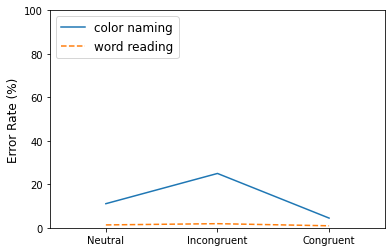

In [ ]:
# STROOP NETWORK WEIGHTS

bias = -4

# weights projecting from color input layer to color hidden layer
W_input_color_hidden_color = 2.2 * np.array([[1, -1],
                                             [-1, 1]])

# weights projecting from color hidden layer to output layer
W_hidden_color_output = 1.3 * np.array([[1, -1],
                                        [-1, 1]])

# weights projecting from word input layer to word hidden layer
W_input_word_hidden_word = 2.6 * np.array([[1, -1],
                                           [-1, 1]])

# weights projecting from word hidden layer to output layer
W_hidden_word_output = 2.5 * np.array([[1, -1],
                                      [-1, 1]])

# weights projecting from task layer to color hidden layer
W_input_task_hidden_color = 4.0 * np.array([[1, 1],
                                            [0, 0]])

# weights projecting from task layer to word hidden layer
W_input_task_hidden_word = 4.0 * np.array([[0, 0],
                                           [1, 1]])


# PLOT THE NETWORK PERFORMANCE

(cn_congruent_error_rate, cn_incongruent_error_rate, cn_neutral_error_rate,
            wr_congruent_error_rate, wr_incongruent_error_rate, wr_neutral_error_rate) = runStroopExperiment()

x_data = [0, 1, 2]
y_data_col = [cn_neutral_error_rate * 100, cn_incongruent_error_rate * 100, cn_congruent_error_rate * 100]
y_data_wrd = [wr_neutral_error_rate * 100, wr_incongruent_error_rate * 100, wr_congruent_error_rate * 100]
x_limit = [-0.5, 2.5]
y_limit = [0, 100]
x_label = "Condition"
y_label = "Error Rate (%)"
legend = ('color naming', 'word reading')

plt.plot(x_data, y_data_col, label=legend[0])
plt.plot(x_data, y_data_wrd, '--', label=legend[1])
plt.xlim(x_limit)
plt.ylim(y_limit)
plt.ylabel(y_label, fontsize="large")
plt.legend(loc=2, fontsize="large")
plt.xticks([0, 1, 2], ['Neutral', 'Incongruent', 'Congruent'],rotation=0)
plt.show()

# References and Further Reading

#### General Introductions

*   **Neural network models of human cognition**: McClelland, James L., David E. Rumelhart, and PDP Research Group. Parallel distributed processing. Vol. 2. Cambridge, MA: MIT press, 1986.
*   **Biologically-inspired neural network models**: O'Reilly, R. C., & Munakata, Y. (2000). Computational explorations in cognitive neuroscience: Understanding the mind by simulating the brain. MIT press.
*   **Machine learning**: Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep learning. MIT press.


#### Neural Networks as Models of Mental Effort
*   **Cognitive Control & the Stroop Task**: Cohen, J. D., Dunbar, K., & McClelland, J. L. (1990). On the control of automatic processes: a parallel distributed processing account of the Stroop effect. Psychological review, 97(3), 332.
*   **Cognitive Control & Conflict Monitoring**: Botvinick, M. M., Braver, T. S., Barch, D. M., Carter, C. S., & Cohen, J. D. (2001). Conflict monitoring and cognitive control. Psychological review, 108(3), 624.
*   **Cognitive Control & Task Switching**: Gilbert, S. J., & Shallice, T. (2002). Task switching: A PDP model. Cognitive psychology, 44(3), 297-337.
*   **Cognitive Control & Multitasking**: Musslick, S., & Cohen, J. D. (2021). Rationalizing constraints on the capacity for cognitive control. Trends in Cognitive Sciences. 25(9), 757–775
*   **Decision-Making**: Usher, M., & McClelland, J. L. (2001). The time course of perceptual choice: the leaky, competing accumulator model. Psychological review, 108(3), 550.

#### Other References
*   **Recommended tutorial for machine learning**: https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html
*   **Early criticism of neural networks**: Minksy, M., & Papert, S. (1969). Perceptrons: An Introduction to Computational Geometry. MIT. Press.
*   **Semantic Cognition**: Rogers, T. T., & McClelland, J. L. (2004). Semantic cognition: A parallel distributed processing approach. MIT press.
*   **Semantic Development**: Saxe, A. M., McClelland, J. L., & Ganguli, S. (2019). A mathematical theory of semantic development in deep neural networks. Proceedings of the National Academy of Sciences, 116(23), 11537-11546.